Wyatt Kirby
IRK180000
CS 4395.001

# Text Classification 2
## Importing Dataset
Here I'm simply importing the dataframe.

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)

df = pd.read_csv(file)

df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


## Graphing the Data

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

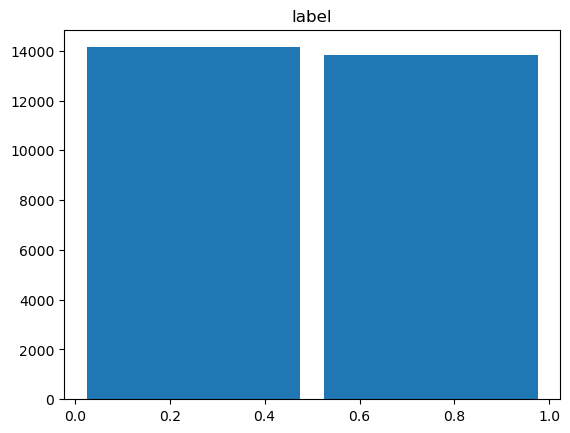

In [55]:
df.hist(column='label', bins=2, grid=False, rwidth=.9)

This shows that in this dataset there are almost an equivalent amount of those that show signs of possible mental health issues and those that show no signs of such issues.

## Prepping Data

In [56]:
'''
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

stop = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stop)
x = df.text
y = df.label

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, train_size=.8, random_state=1234)
print(x.shape)
print(xtest.shape)
print(xtrain.shape)

xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)
'''
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
df.text = df.text.astype('str')
df.label = df.label.astype('category')

np.random.seed(1234)
i = np.random.rand(len(df)) < .8
train = df[i]
test = df[~i]

print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (22396, 2)
test shape:  (5581, 2)


In [57]:
tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(train.text)

xtrain = tokenizer.texts_to_matrix(train.text, mode='tfidf')
xtest = tokenizer.texts_to_matrix(test.text)

encoder = LabelEncoder()
encoder.fit(train.label)
ytrain = encoder.transform(train.label)
ytest = encoder.transform(test.label)


## Compile our Sequential Model

In [58]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sequential_mode = model.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
700/700 [==============================] - 7s 9ms/step - loss: 0.2647 - accuracy: 0.9024
Epoch 2/10
700/700 [==============================] - 7s 9ms/step - loss: 0.0944 - accuracy: 0.9648
Epoch 3/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0444 - accuracy: 0.9829
Epoch 4/10
700/700 [==============================] - 6s 9ms/step - loss: 0.0232 - accuracy: 0.9922
Epoch 5/10
700/700 [==============================] - 6s 9ms/step - loss: 0.0133 - accuracy: 0.9954
Epoch 6/10
700/700 [==============================] - 6s 9ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 7/10
700/700 [==============================] - 6s 9ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 8/10
700/700 [==============================] - 6s 9ms/step - loss: 0.0069 - accuracy: 0.9975
Epoch 9/10
700/700 [==============================] - 6s 9ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 10/10
700/700 [==============================] - 6s 9ms/step - loss: 0.0027 - accuracy: 0.999

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(xtest)
pred = [1.0 if p>= .5 else 0.0 for p in pred]
print(classification_report(ytest, pred))
print('\nClassification Report:\n', confusion_matrix(ytest, pred))

175/175 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2840
           1       0.81      0.97      0.88      2741

    accuracy                           0.87      5581
   macro avg       0.89      0.88      0.87      5581
weighted avg       0.89      0.87      0.87      5581


Classification Report:
 [[2229  611]
 [  92 2649]]


## Simple RNN

This model takes a really long time to run, so I split the data up so that it wouldn't have to train or test on ~30,000 data points.

##Prepping Data

In [68]:
i = np.random.rand(len(xtest)) < .2
rnnx = xtest[i]
rnny = ytest[i]
rnnxtrain, rnnxtest, rnnytrain, rnnytest = train_test_split(rnnx, rnny, test_size=.2, train_size=.8, random_state=1234)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model = model.fit(rnnxtrain, rnnytrain, epochs=1)

23/30 [======================>.......] - ETA: 17:57 - loss: 0.6975 - accuracy: 0.5177

In [59]:
pred = model.predict(rnnxtest)
pred = [1.0 if p>= .5 else 0.0 for p in pred]
print(classification_report(rnnytest, pred))
print('\nClassification Report:\n', confusion_matrix(rnnytest, pred))

175/175 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2840
           1       0.81      0.97      0.88      2741

    accuracy                           0.87      5581
   macro avg       0.89      0.88      0.87      5581
weighted avg       0.89      0.87      0.87      5581


Classification Report:
 [[2229  611]
 [  92 2649]]


## Gloves Embedding

Prepping data and setting up the validation values

In [ ]:
train, xval = train_test_split(df, test_size=0.2, random_state=2018)

yval = xval.label
xval = xval.text

embed_size = 300 

tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(list(xtrain))

distxtrain = tokenizer.texts_to_sequences(xtrain)
distxval = tokenizer.texts_to_sequences(xval)
distxtest = tokenizer.texts_to_sequences(xtest)

distxtrain = pad_sequences(distxtrain, maxlen=100)
distxval = pad_sequences(distxval, maxlen=100)
distxtest = pad_sequences(distxtest, maxlen=100)

In [ ]:
EMBEDDINGFILE = '../input/embeddings/glove.840B.300d/glove.840B.300d.txt'
def getcoefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDINGFILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(30000, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= 30000: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
        
inp = Input(shape=(100,))
x = Embedding(30000, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(distxtrain, distytrain, batch_size=512, epochs=2, validation_data=(distval, yval))

## Analysis

For this assignment the sequential model worked the best out of all of them. This is partially because of the loading time and being unable to test my embedding section as the SimpleRNN took so long to load. I tried with the initial dataset and with 10 epochs, but it was estimated to take 5 hours for a single epoch. To try and account for this I decided to trim down the number of epochs and reduce the dataframe size, but this only helped marginally. I ended up using only 4% of the overall dataframe and it still was estimating that each epoch would take an hour and a half. I ended up reducing the epochs to one, but while running it took longer that the ETA stated and I had already waited until after the deadline had passed. It at least gives a general accuracy estimate while training, so I'll be using that number. This accuracy was 52%, which is generally frustrating because I know that if this was able to process faster and do more training rounds that this would be decently accurate, likely surpassing the sequential model. I would have liked to have been able to run the Gloves embedding, but I'm currently unable to run it.